<a href="https://colab.research.google.com/github/iProlly/Machine-Learning-PBL/blob/main/Modification_Command.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This .ipynb is only for .csv modification
---
\
There is **no machine learning** components in this file. This is only for .csv modification.

Currently, we only accept 7 types of input. Different input require different section of coding cell, so choose the section suitable to your need.

1. Normalization: If you want to just only normalize data, do it here.
2. Normalized concatenation (many files): Suppose you have many files. Each files are corresponding to a compound, and you want to connect them (with  normalization) into 1 file.
3. Normal augmentation: Suppose you have a file, containing labels and data of all samples, and you want to add new datapoint based on labels you have.
4. Mixture creation: Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture.
5. Mixture creation with ratio: Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture. You want labels to be ratio, rather than the presence.
6. Mixture creation with ratio (Compulsary compound): Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture. You want labels to be ratio, rather than the presence. You also want to have the compulsary compound to decrease bias.
7. Changing to MATLAB Format: File from section 4, 5 can be converted to MATLAB usable format here.

There will be more explanation at each section, about what kind of input we need, and what parameters we can adjust.

Before you begin to run at any section. Make sure to run these 2 cells below first. These are module import and defined function. After you finished, you may begin start at your section.

In [ ]:
# Module Import
import pandas as pd
import numpy as np
import os
from google.colab import drive
import random
import io
import itertools

In [ ]:
# Defined function

# This function is to augment data without creating mixture. (one compound)
def augment_data_one(X, num_new_samples, noise_std=0.05):
    n_samples = len(X)
    X_augmented = []

    for _ in range(num_new_samples):
        # Generate random coefficients for all samples & normalize it
        coefficients = np.random.rand(n_samples)
        coefficients /= np.sum(coefficients)

        # Create the new sample as a weighted sum of all samples
        new_sample = np.sum(coefficients[:, np.newaxis] * X, axis=0)

        # Add Gaussian Noise
        noise = np.random.normal(0, noise_std * (new_sample.max() - new_sample.min()), new_sample.shape)
        new_sample += noise

        # Renormalize to range [0, 10000]
        new_sample = 10000 * (new_sample - new_sample.min()) / (new_sample.max() - new_sample.min())

        X_augmented.append(new_sample)

    return X_augmented

# This function is to augment data with creating mixture. (many compounds)
def augment_data_many(X, index, noise_std=0.05):
    temp_list = []
    # Generate random coefficients for all samples & normalize it
    coefficients = np.random.rand(len(index))
    coefficients /= np.sum(coefficients)
    while (coefficients[0]<=0.25 or coefficients[0]>= 0.75):
      coefficients = np.random.rand(len(index))
      coefficients /= np.sum(coefficients)

    # Extract data of compound according to index
    for j in index:
      k = random.randint(0,len(X[j])-1)
      temp_list.append(X[j][k])

    temp_list = np.array(temp_list)
    # Create the new sample as a weighted sum of all samples
    new_sample = np.sum(coefficients[:, np.newaxis] * temp_list, axis=0)

    # Add Gaussian Noise
    noise = np.random.normal(0, noise_std * (new_sample.max() - new_sample.min()), new_sample.shape)
    new_sample += noise

    # Renormalize to range [0, 10000]
    new_sample = 10000 * (new_sample - new_sample.min()) / (new_sample.max() - new_sample.min())

    return new_sample, coefficients

# This is normalization to range [0, 10000]
def normalize(X):
  new_sample = 10000 * (X - X.min()) / (X.max() - X.min())

  return new_sample

# 1st Section: Normalization

Suppose you have these non-normalizded data. If you want to normalize it without any other augmentation.

---

Input we need: 1 .csv file with every datapoint you have. You must have header, namely label and feature. See **good** example below.

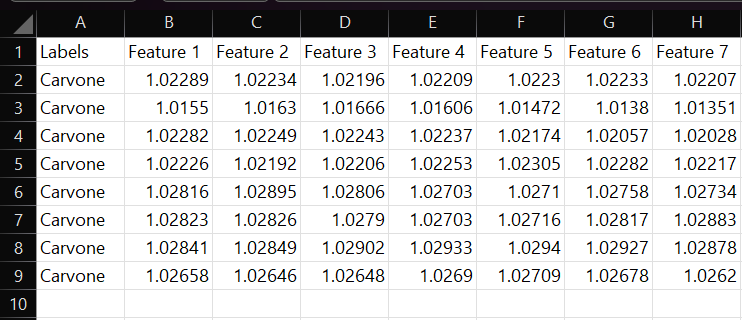

When finished, there will be one output file with all augmented data, labels, and header. See example below.

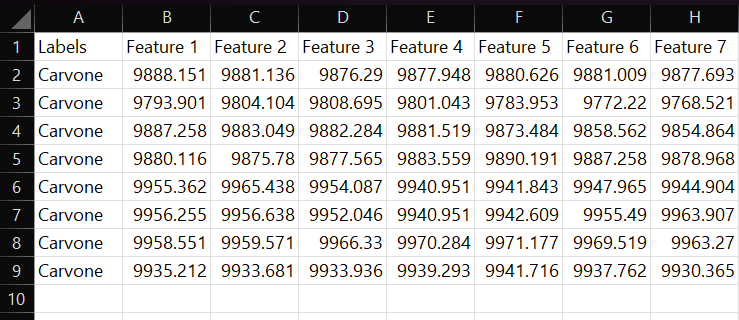



In [ ]:
# NORMALIZATION 1

# Parameters
# Type the name of .csv file, including .csv
file_name = 'mix.csv'

In [ ]:
# NORMALIZATION 2

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data = normalize(data_raw)

# Setup output header
head = ["Labels"]
for i in range(data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((labels, data)), columns = head)
df.to_csv('output.csv', index=False, header=True)

# 2nd section: Normalized concatenation (many files)
Suppose you have many .csv files. Each files are corresponding to different compounds, and you want to stack them together to form one new .csv.

---
Input we need: **more than 1** .csv file. Each files are corresponding to one label. You **must not** have any header. (no labels, no feature, this is different from above). See **good** example below.

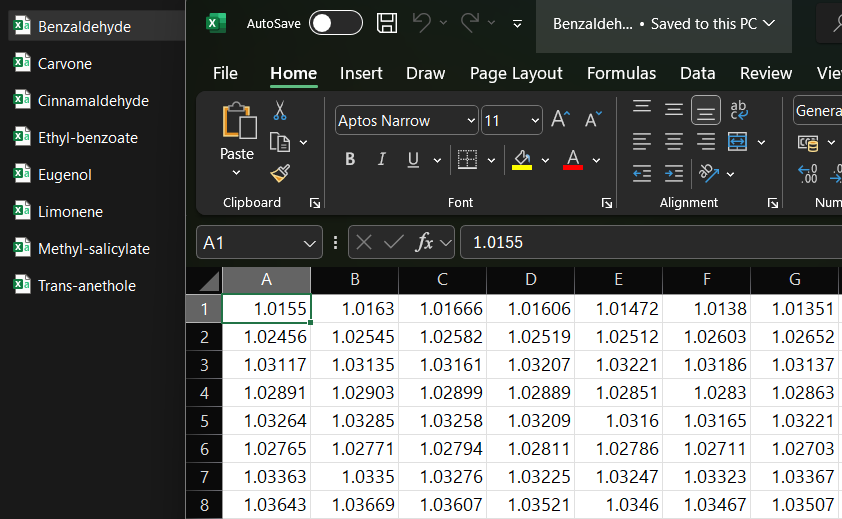

For this section, there are several things required to do.
1. Need to name the file as compound name, or the label you want it to be.
2. When you upload the file onto the session, you **must** upload and put in the folder **data** (create one).

When finished, there will be one output file with all data, labels, and header. See example below.

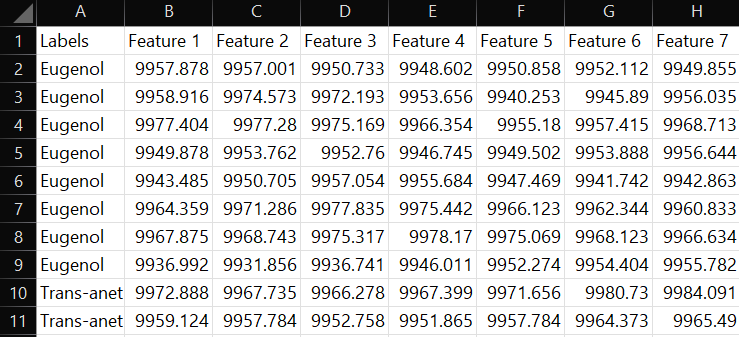

In [ ]:
# NORMALIZED CONCATENATION 1
data_dir = '/content/Data'

compound_list = []
Rawdata = []

# Extract Data, Normalize it, Put it together
for filename in os.listdir(data_dir):
  if filename.endswith('.csv'):
    compound_list.append(filename[:-4])
    file_path = os.path.join(data_dir, filename)
    df = pd.read_csv(file_path, header = None)
    intensity = df.to_numpy()
    for i in range(len(intensity)):
      intensity[i] = normalize(intensity[i])
    Rawdata.append(intensity)
Rawdata = np.array(Rawdata)

In [ ]:
# NORMALIZED CONCATENATION 2

data = []
labels = []

# Rearrange Data
for i in range(Rawdata.shape[0]):
  data.extend(Rawdata[i])
  labels.extend([compound_list[i]]*Rawdata.shape[1])

data = np.array(data)
labels = np.array(labels)

# Setup output header
head = ["Labels"]
for i in range(data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((labels, data)), columns = head)
df.to_csv('output.csv', index=False, header=True)

# 3rd section: Normalized augmentation
Suppose you have one file, containing labels and data of all samples, and you want to add new datapoint based on labels you have.

---
Input we need: 1 .csv file with every datapoint you have. You **must** have header, namely label and feature. See **good** example below.

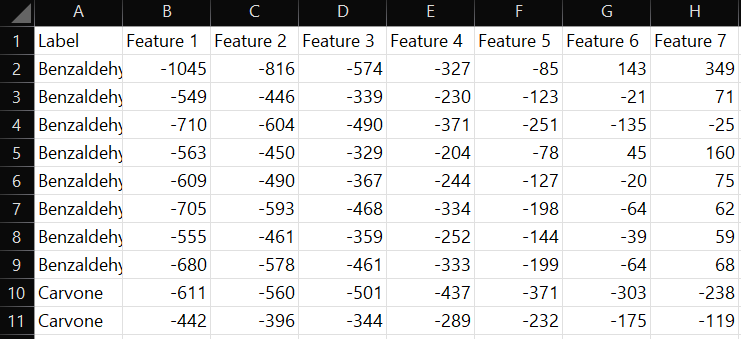

When finished, there will be one output file with all augmented data, labels, and header. See example below.

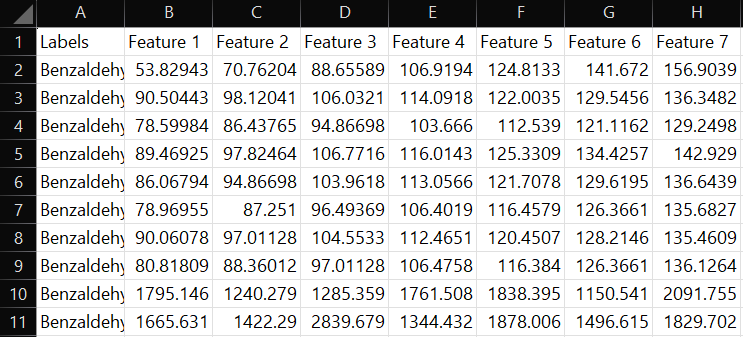

You can adjust parameters in the first cell.

In [ ]:
# NORMALIZED AUGMENTATION 1

# num_per_sample is the number of samples per labels you want it to have.
num_per_sample = 500

# give out the .csv input file you just upload, you must include .csv
file_name = 'Combined_IR.csv'

In [ ]:
# NORMALIZED AUGMENTATION 2

data = []
labels = []

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

# Augment Data, Loop for every labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []
  labels_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
      labels_temp.append(labels_raw[j])

  # Augment on that one label
  data_augmented = augment_data_one(data_temp, num_per_sample - len(labels_temp))
  data_temp.extend(data_augmented)
  labels_temp.extend(labels_temp[:1]*len(data_augmented))
  data.extend(data_temp)
  labels.extend(labels_temp)

data = np.array(data)
labels = np.array(labels)

In [ ]:
# NORMALIZED AUGMENTATION 3

# Setup output header
head = ["Labels"]
for i in range(data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((labels, data)), columns = head)
df.to_csv('output.csv', index=False, header=True)

KeyboardInterrupt: 

# 4th section: Mixture creation
Suppose you have one file, containing labels and data of all samples, and you want to mix them together to form mixture.

---
Input we need: 1 .csv file with every datapoint you have. You **must** have header, namely label and feature. See **good** example below.


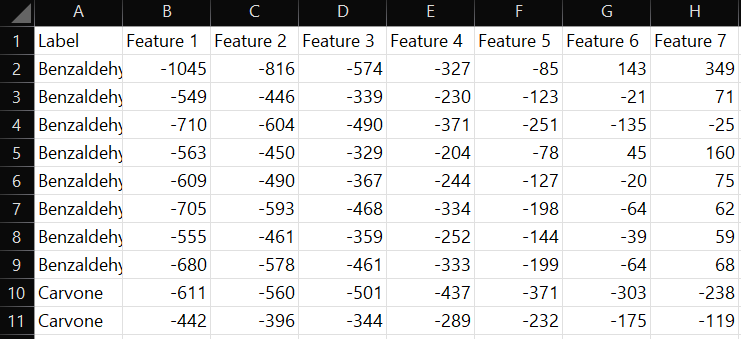

When finished, there will be one output file with all augmented data, labels, and header. See example below.

All mixture combination are equally distributed.

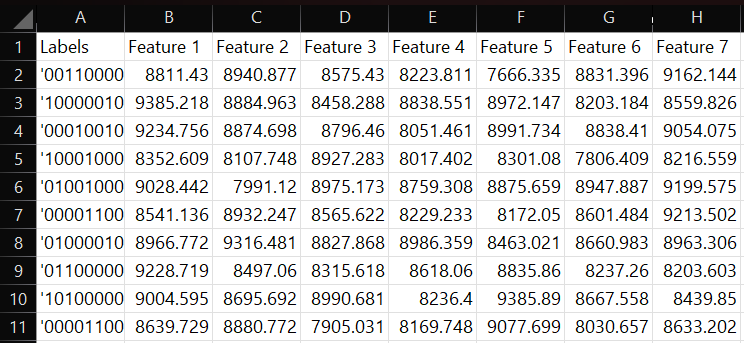

The labels represent the existence of compound in mixture in binary format. "0" = not exist, and "1" = exist. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00110000"
- There is "1" in the 3rd and the 4th position, it means that the 3rd and the 4th compounds exist, others do not.
- What is the 3rd and the 4th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Cinnamaldehyde and Ethyl-benzoate!
- Thus this samples contain Cinnamaldehyde and Ethyl-benzoate!

You can adjust parameters in the first cell.

In [ ]:
# MIXTURE CREATION 1

# num_compound is the number of compound in the mixture you want it to have.
num_compound = 2

# num_per_combination is the number of datapoint for each combination
num_per_combination = 250

# give out the .csv input file you just upload, you must include .csv
file_name = 'Combined_IR.csv'

In [ ]:
# MIXTURE CREATION 2
Rawdata = []

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Augment Data, Loop for every labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)

Rawdata = np.array(Rawdata)
print(compound_list)

['Benzaldehyde', 'Carvone', 'Cinnamaldehyde', 'Ethyl-benzoate', 'Eugenol', 'Limonene', 'Methyl-salicylate', 'Trans-anethole']


In [ ]:
# MIXTURE CREATION 3

# Generate all possible combination of mixture
combinations = list(itertools.combinations(range(8), num_compound))
combination_list = []
for combo in combinations:
    binary = ['0'] * 8
    for i in range(num_compound):
      binary[combo[i]] = '1'
    combination_list.append(''.join(binary))

In [ ]:
# MIXTURE CREATION 4

augmented_data = []
binary_labels = []

# Augmentation, loop for every combination
for i in range(len(combination_list)):
  label = "'" + combination_list[i]
  label_index = []

  # Detect what is the compound in mixture
  for j in range(8):
    if combination_list[i][j] == '1':
      label_index.append(j)

  # For each combination, create a new datapoint
  for k in range(num_per_combination):
    newpoint, coeff = augment_data_many(Rawdata, label_index)
    augmented_data.append(newpoint)

  binary_labels.extend([label]*num_per_combination)
augmented_data = np.array(augmented_data)

In [ ]:
# MIXTURE CREATION 5

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(binary_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# 5th section: Mixture creation with ratio
Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture. You want labels to be ratio, rather than the presence.

---
Input we need: 1 .csv file with datapoint you have. You **must** have header, namely label and feature. See **good** example below.


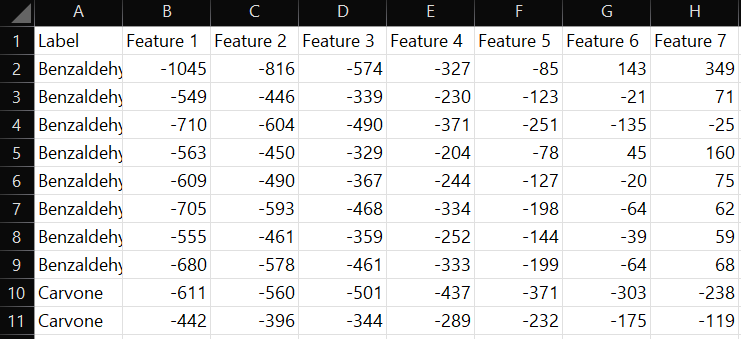

When finished, there will be one output file with all augmented data, labels, and header. See example below.

All mixture combination are equally distributed.

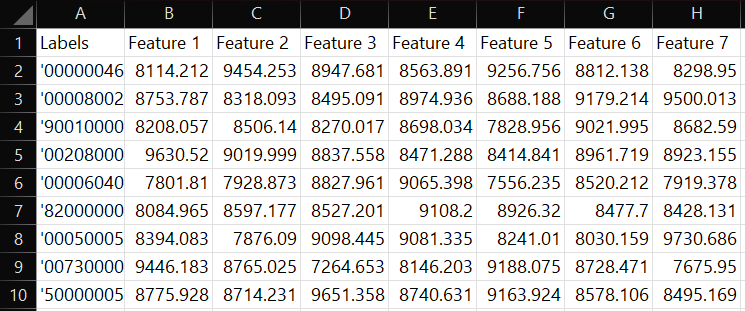

The labels represent the ratio of compound in mixture in decimal format. "0" = not exist, "1" = 10%, "2" = 20% and so on. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00000046"
- There is "4" in the 7th position and 6 in the 8th position, it means that the mixture composed of 40% of 7th compound and 60% of 8th compound.
- What is the 7th and the 8th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Carvone and Limonene!
- Thus this samples contain 40% Carvone and 60% Limonene.

You can adjust parameters in the first cell.

In [ ]:
# MIXTURE CREATION WITH RATIO 1

# num_compound is the number of compound in the mixture you want it to have.
num_compound = 2

# num_per_combination is the number of datapoint for each combination
num_per_combination = 200

# give out the .csv input file you just upload, you must include .csv
file_name = 'Combined_IR.csv'

In [ ]:
# MIXTURE CREATION WITH RATIO 2
Rawdata = []

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Separate data according to labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)

Rawdata = np.array(Rawdata)
print(compound_list)

['Benzaldehyde', 'Carvone', 'Cinnamaldehyde', 'Ethyl-benzoate', 'Eugenol', 'Limonene', 'Methyl-salicylate', 'Trans-anethole']


In [ ]:
# MIXTURE CREATION WITH RATIO 3

# Generate all possible combination of mixture
combinations = list(itertools.combinations(range(8), num_compound))
combination_list = []
for combo in combinations:
    binary = ['0'] * 8
    for i in range(num_compound):
      binary[combo[i]] = '1'
    combination_list.append(''.join(binary))

In [ ]:
# MIXTURE CREATION WITH RATIO 4

augmented_data = []
ratio_labels = []

# Augmentation (By combination), loop for every combination
for i in range(len(combination_list)):
  label = "'" + combination_list[i]
  label_index = []
  # Detect what is the compound in mixture
  for j in range(8):
    if combination_list[i][j] == '1':
      label_index.append(j)
  # For each combination, create a new datapoint
  for k in range(num_per_combination):
    # Augment Data
    newpoint, coeff = augment_data_many(Rawdata, label_index)
    augmented_data.append(newpoint)
    # Add labels
    label = "'"
    counter = 0
    for k in range(len(compound_list)):
      if k in label_index:
        label += str(round(coeff[counter],1))[2]
        counter += 1
      else:
        label += '0'
    ratio_labels.append(label)

augmented_data = np.array(augmented_data)

In [ ]:
# MIXTURE CREATION WITH RATIO 5

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(ratio_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# 6th section: Mixture creation with ratio (Compulsary compound)
Suppose you have 1 file, containing labels and data of all samples, and you want to mix them together to form mixture. You want labels to be ratio, rather than the presence. You also want to have the compulsary compound to decrease bias.

---
Input we need: 1 .csv file with datapoint you have. You **must** have header, namely label and feature. See **good** example below.


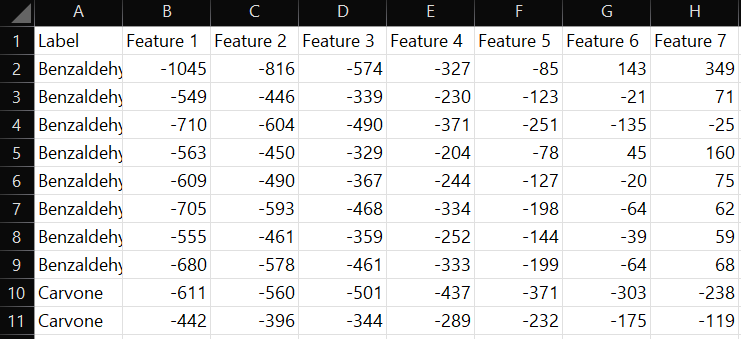

When finished, there will be one output file with all augmented data, labels, and header. See example below.

All mixture combination are equally distributed.

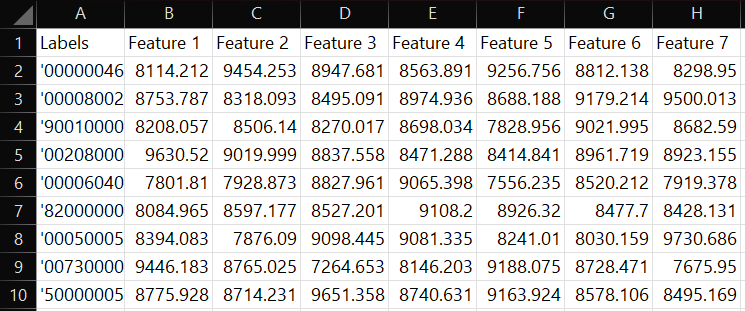

The labels represent the ratio of compound in mixture in decimal format. "0" = not exist, "1" = 10%, "2" = 20% and so on. Here is example of how to read it.
- In the first sample (in the picture above): the label is "00000046"
- There is "4" in the 7th position and 6 in the 8th position, it means that the mixture composed of 40% of 7th compound and 60% of 8th compound.
- What is the 7th and the 8th compounds? look at variable compound_list. (This is **extremely important**, you **must** note compound_list) It is Carvone and Limonene!
- Thus this samples contain 40% Carvone and 60% Limonene.

You can adjust parameters in the first cell.

In [ ]:
# MIXTURE CREATION WITH RATIO AND COMPULSARY COMPOUND 1

# num_compound is the number of compound in the mixture you want it to have.
num_compound = 2

# total_datapoint you want
total_datapoint = 3600

# give out the .csv input file you just upload, you must include .csv
file_name = 'Combined_IR.csv'

In [ ]:
# MIXTURE CREATION WITH RATIO AND COMPULSARY COMPOUND 2
Rawdata = []

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values
data_raw = normalize(data_raw)

compound_list = list(np.unique(labels_raw))

# Separate data according to labels
for i in range(np.unique(labels_raw).shape[0]):
  data_temp = []

  # Extract only one kind label to augment
  for j in range(labels_raw.shape[0]):
    if np.unique(labels_raw)[i] == labels_raw[j]:
      data_temp.append(data_raw[j])
  Rawdata.append(data_temp)

Rawdata = np.array(Rawdata)
print(compound_list)

['Benzaldehyde', 'Carvone', 'Cinnamaldehyde', 'Ethyl-benzoate', 'Eugenol', 'Limonene', 'Methyl-salicylate', 'Trans-anethole']


In [ ]:
# MIXTURE CREATION WITH RATIO AND COMPULSARY COMPOUND 3

# give the index of the compulsary compound that you want, check the print if it matches your need
compulsary_compound = 6
print(compound_list[compulsary_compound-1])

Limonene


In [ ]:
# MIXTURE CREATION WITH RATIO AND COMPULSARY COMPOUND 4

augmented_data = []
ratio_labels = []

for i in range(total_datapoint):
  # Pick compound for each datapoint
  all_label = list(range(0, 8))
  all_label.remove(compulsary_compound-1)
  label_index = []
  if i < total_datapoint/6:
    label_index = random.sample(all_label, num_compound)
  else:
    label_index = random.sample(all_label, num_compound-1)
    label_index.append(compulsary_compound-1)
  label_index.sort()

  # Create datapoint
  newpoint, coeff = augment_data_many(Rawdata, label_index)

  # Add labels
  label = "'"
  counter = 0
  for k in range(len(compound_list)):
    if k in label_index:
      label += str(round(coeff[counter],1))[2]
      counter += 1
    else:
      label += '0'
  ratio_labels.append(label)

  # Augment Data
  augmented_data.append(newpoint)

augmented_data = np.array(augmented_data)

In [ ]:
# MIXTURE CREATION WITH RATIO AND COMPULSARY COMPOUND 5

# Setup output header
head = ["Labels"]
for i in range(augmented_data.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(ratio_labels), augmented_data)), columns=head)
df.to_csv('output.csv', index=False, header=True)

# 7th Section: Changing to MATLAB Format

Suppose you have data of mixture with binary string labels (see pic below). This is not practically usable for MATLAB because you basically have 2^(number of compound) = 256 labels. It is better for you to split every digits of labels, so that you can use it in MATLAB.

---

Input we need: 1 .csv file. You **must** have header including labels and feature. See **good** example below.

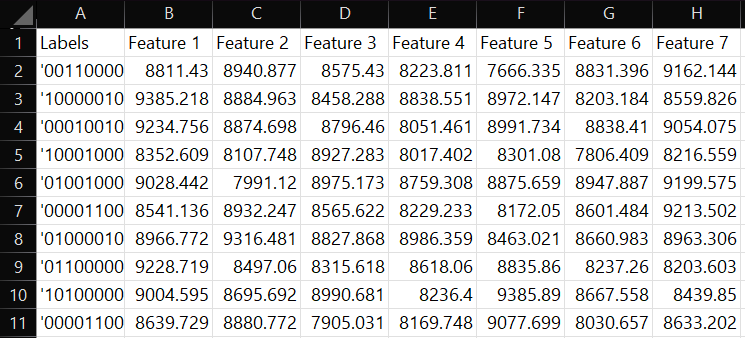

When finished, there will be one output file with all augmented data, labels, and header. See example below.

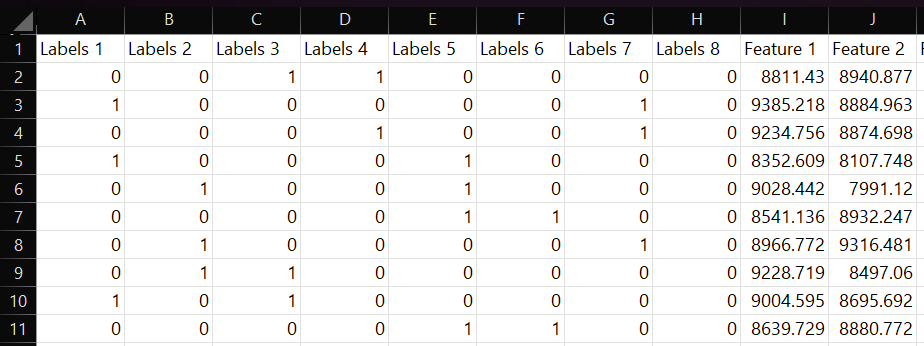

This is continuous part from mixture creation. So, consider using these below!

In [ ]:
# CONVERSION TO MATLAB 1

# give out the .csv input file you just upload, you must include .csv
file_name = 'output.csv'

In [ ]:
# CONVERSION TO MATLAB 2

# Extract Data, Normalize it
raw = pd.read_csv('/content/' + file_name)
labels_raw = raw.iloc[:, 0].values
data_raw = raw.iloc[:, 1:].values

# Add new labels (splitted one)
new_labels = []
for i in range(len(labels_raw)):
  new_labels.append(list(labels_raw[i][1:]))

# Setup output header
head = []
for j in range(len(new_labels[0])):
  text = "Labels " + str(j+1)
  head.append(text)

for i in range(data_raw.shape[1]):
  head.append("Feature "+ str(i+1))
head = np.array(head)

# Output
df = pd.DataFrame(np.column_stack((np.array(new_labels), data_raw)), columns=head)
df.to_csv('output1.csv', index=False, header=True)